> *Классы представляют из себя фабрики для генерирования множества объектов экземпляров.*

> *Экземпляр класса передается методу в особом первом аргументе, который по соглашению называется **self**. Методы принимают этот аргумент для обработки объекта, на котором произведен вызов. Методы можно вызывать либо через экземпляр, либо через класс, и обе формы служат своим целям в сценариях.*

In [ ]:
class Base:
    def __init__(self):
        ...
        
    def some_method(self, val):
        ...
        
a = Base()
#1
a.some_method(val)
#2
Base.some_method(a, val)

> *Присваивания внутри операторов **class** создают атрибуты классов. Как и в файлах модулей, присваивания на верхнем уровне внутри оператора **class** (не вложенные в def) генерируют атрибуты в объекте класса. После выполнения оператора **class** атрибуты класса доступны посредством уточнения с помощью имени: **объект.имя**.*

> *Каждый объект экземпляра наследует атрибуты класса и суперкласса и получает собственное пространство имен.*

In [1]:
class class_A:
    count = 5
    
    def __init__(self):
        ...

    def count_up(self, val):
        self.count+=val

a = class_A()
print(a.count)
b = class_A()
b.count_up(2)
print(b.count)

5
7


In [2]:
class class_B(class_A):
    def __init__(self):
        ...
        
c = class_B()
c.count_up(3)
print(c.count)

8


### Класс как структура.

In [3]:
class rec: pass    # Объявление пустого класса - фабрика структур

pers1 = rec()
pers1.name = 'Maks'
pers1.age = 18

pers2 = rec()
pers2.name = 'John'
pers2.age = 21

print(pers1.name, pers1.age)
print(pers2.name, pers2.age)

Maks 18
John 21


> *Для упрощения поиска в иерархии наследования при извлечении атрибутов каждый экземпляр имеет связь со своим классом, которую создает Python — она называется **\_\_class\_\_** и ее можно просмотреть. Классы также располагают атрибутом **\_\_bases\_\_**, который является кортежем ссылок на их объекты суперклассов.*

In [4]:
class Base:
    pass

a = Base()
print(a.__class__)
print(Base.__bases__)

<class '__main__.Base'>
(<class 'object'>,)


> *Для извлечения аттрибутов класса или экземпляра можно воспользоваться **\_\_dict\_\_**. Унаследованные атрибуты класса присоединяются только к классу, они не копируются в экземпляры. Функция **dir()** отображает также и унаследованные аттрибуты объекта.*

In [5]:
class class_A:
    countA = 0
    ...
    
a = class_A()
a.count_ex = 7

print(class_A.__dict__)
print(a.__dict__)
# но 
print(dir(a)) 

{'__module__': '__main__', 'countA': 0, '__dict__': <attribute '__dict__' of 'class_A' objects>, '__weakref__': <attribute '__weakref__' of 'class_A' objects>, '__doc__': None}
{'count_ex': 7}
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'countA', 'count_ex']


### \_\_str\_\_ и \_\_repr\_\_

> *__\_\_str\_\_()__ метод возвращает строковое представление объекта. Этот метод вызывается, когда для объекта вызывается функция print() или str(). Если мы не реализуем функцию **\_\_str\_\_()** для класса, тогда используется встроенная реализация объекта, которая фактически вызывает функцию **\_\_repr\_\_()**.*
>
> *__\_\_repr\_\_()__ метод возвращает представление объекта. Этот метод вызывается, когда для объекта используется функция repr(), в этом случае функция **\_\_repr\_\_()** должна возвращать String, иначе будет выдана ошибка.*
>
> *Если реализация **\_\_str\_\_** отсутствует, то функция **\_\_repr\_\_** используется как резерв.*
>
> *То есть **\_\_repr\_\_** используется везде, исключая print и str, когда метод **\_\_str\_\_** определен. Это означает, что вы можете реализовать метод **\_\_repr\_\_** для определения единственного формата отображения, применяемого повсюду, и метод **\_\_str\_\_** либо для поддержки единственно print и str, либо чтобы предоставить для них альтернативное отображение.*
>
> *В зависимости от логики преобразования в строки дружественное к пользователю отображение **\_\_str\_\_** может применяться, только когда объекты находятся на верхнем уровне операции print; объекты, вложенные внутрь более крупных объектов, могут по-прежнему выводиться посредством **\_\_repr\_\_** либо их стандартных методов.*

In [6]:
class IP_Adress:
    def __init__(self, ip):
        self.ip = ip
        self.name = 'IP_Address'
        
    def __str__(self):
        return f'str_IPAdress({self.ip})'
    
    def __repr__(self):
        return "{'name': self.name, 'ip': self.ip}"
    
p = IP_Adress('10.0.0.1')

# __str__() example
print(p)
print(p.__str__())
print(str(p)) 

# __repr__() example
print(p.__repr__())
print(type(p.__repr__()))
print(repr(p))


# но!
class IP_Adress_2:
    def __init__(self, ip):
        self.ip = ip
        self.name = 'IP_Address'
        
    def __str__(self):
        return f'str_IPAdress({self.ip})'

# уровни отображения, у второго класса не определен метод repr, поэтому выполняется метод str, 
# который не может на низких уровнях
objs = [IP_Adress('10.0.0.2'), IP_Adress_2('10.0.0.3')]
print(objs)

str_IPAdress(10.0.0.1)
str_IPAdress(10.0.0.1)
str_IPAdress(10.0.0.1)
{'name': self.name, 'ip': self.ip}
<class 'str'>
{'name': self.name, 'ip': self.ip}
[{'name': self.name, 'ip': self.ip}, <__main__.IP_Adress_2 object at 0x0000016E807EFF10>]


> *Расширение (настройка) методов суперкласса в дочернем классе. На стадии конструирования Python ищет и вызывает только один метод **\_\_init\_\_**. Если конструкторам подклассов нужна гарантия того, что также выполняется логика стадии конструирования суперкласса, тогда в общем случае они обязаны явно вызывать метод **\_\_init\_\_** суперкласса через класс. Класс **class\_B** замещает методы **\_\_init\_\_** и calculate суперкласса **class\_A** собственной специализированной версией, а внутри самого замещения **class\_B** обращается к версии, экспортируемой класса **class\_A**, чтобы обеспечить выполнение стандартного поведения.*

In [7]:
class class_A:
    def __init__(self, var):
        self.var = var
    
    def calculate(self, koef):
        return self.var*koef
    
class class_B(class_A):
    def __init__(self):
        class_A.__init__(self, var=45)     #  Вызов метода через класс
    
    def calculate(self, koef, alpha):
        return class_A.calculate(self, koef*alpha)
        

a = class_A(10)
print(a.calculate(1.2))

b = class_B()
print(b.calculate(1.2, 2))

12.0
108.0


> *Расширение дочернего класса новым методом.*

In [8]:
class class_A:
    def __init__(self, var):
        self.var = var
    
    def calculate(self, koef):
        return self.var*koef
    
class class_B(class_A):
    def some_new_method(self, div):
        return self.var / div
    
b = class_B(10)
print(b.some_new_method(2))

a = class_A(20)
print(a.some_new_method(2))  # AttributeError: 'class_A' object has no attribute 'some_new_method'

5.0


AttributeError: 'class_A' object has no attribute 'some_new_method'

> *Замещение метода суперкласса в дочернем классе.*

In [9]:
class class_A:
    def __init__(self, var):
        self.var = var
    
class class_B(class_A):
    def __init__(self, var1, var2):
        self.var1 = var1
        self.var2 = var2

b = class_B(5, 7)
print(b.var1)
print(b.var2)
# но
print(b.var)   # AttributeError: 'class_B' object has no attribute 'var'

5
7


AttributeError: 'class_B' object has no attribute 'var'

### Внедрение объекта класса в другой класс (комбинирование, делегирование). 

> *Делегирование — структура на основе составного объекта, которая управляет внедренным объектом и передает ему вызовы методов.*
>
> *В известном смысле делегирование является особой формой композиции с единственным внедренным объектом, управляемым классом оболочки (иногда называемого промежуточным классом), который предохраняет большую часть или весь интерфейс внедренного объекта. Понятие промежуточных классов временами применяется и к другим механизмам, таким как вызовы функций; при делегировании нас интересуют промежуточные классы для всех линий поведения объекта, включая вызовы методов и прочие операции.*

In [10]:
class class_A:
    def __init__(self, var):
        self.var = var
        
    def calculate(self, koef):
        return self.var * koef
    
    
class class_B:
    def __init__(self, var):
        self.classa = class_A(var)             # внедрение объекта
        
    def calculate(self, koef):
        return self.classa.calculate(koef)    # перехват и делегирование
    
    def __getattr__(self, attr):
        return getattr(self.classa, attr)     # делегирование всех остальных аттрибутов внедряемого объекта

In [ ]:
class Wrapper:
    def __init__ (self, object):
        self.wrapped = object                    # Сохранить объект
    def __getattr__ (self, attrname):
        return getattr(self.wrapped, attrname)   # Делегировать извлечение

### Композиция.

> *Композиция затрагивает внедрение других объектов в объект контейнера и их активизацию для реализации методов контейнера.*

In [11]:
class Seller:
    def __init__(self, name):
        self.name = name
    def work(self):
        print(f'{self.name} works ...')

    
class Customer:
    def __init__(self, name):
        self.name = name
    
    def order(self, seller):
        print(f'{self.name} make an order to seller {seller.name}')
    
    def pay(self, seller):
        print(f'{self.name} pay an order to seller {seller.name}')

    
class Shop: # класс Shop является контейнером
    def __init__ (self) :
        self.seller = Seller('Jack')        # внедрение объекта продавца, у магазина он один !
        
    def order(self, name):
        customer = Customer(name)           # внедрение объекта покупателя, для каждого заказа отдельный покупатель
        customer.order(self.seller)
        self.seller.work()
        customer.pay(self.seller)

        
new_shop = Shop()
new_shop.order('Maks')

Maks make an order to seller Jack
Jack works ...
Maks pay an order to seller Jack


### Методика Provider.

In [12]:
class class_A:
    def __init__(self):
        ...
    
    def action(self):
        raise NotImplementedError('action must be defined!')
    
    def delegate(self):
        print(self.action())

        
class class_B(class_A):
    def action(self):
        return 'Instance class B. Method Action().'
    
    
b = class_B()
b.delegate()
# но
a = class_A()
a.delegate()   # NotImplementedError: action must be defined!

Instance class B. Method Action().


NotImplementedError: action must be defined!

### Абстрактный класс.

> *При такой реализации создавать экземпляры класса с абстрактным методом нельзя, пока в подклассах не будут определены все его абстрактные методы!*

In [13]:
from abc import ABCMeta, abstractmethod

class class_Abstract(metaclass=ABCMeta):
    def delegate(self):
        print(self.action())
    
    @abstractmethod
    def action(self):
        ...

class class_A(class_Abstract):
    ...


class class_B(class_Abstract):
    def action(self):
        return "Abstractmethod Action()"
    
    
b = class_B()
b.delegate()
# но
a = class_A()         # TypeError: Can't instantiate abstract class class_Abstract with abstract method action
# и
abstr = class_Abstract()     # TypeError: Can't instantiate abstract class class_Abstract with abstract method action

Abstractmethod Action()


TypeError: Can't instantiate abstract class class_A with abstract method action

### Перегрузка операций. Методы перегрузки операций.

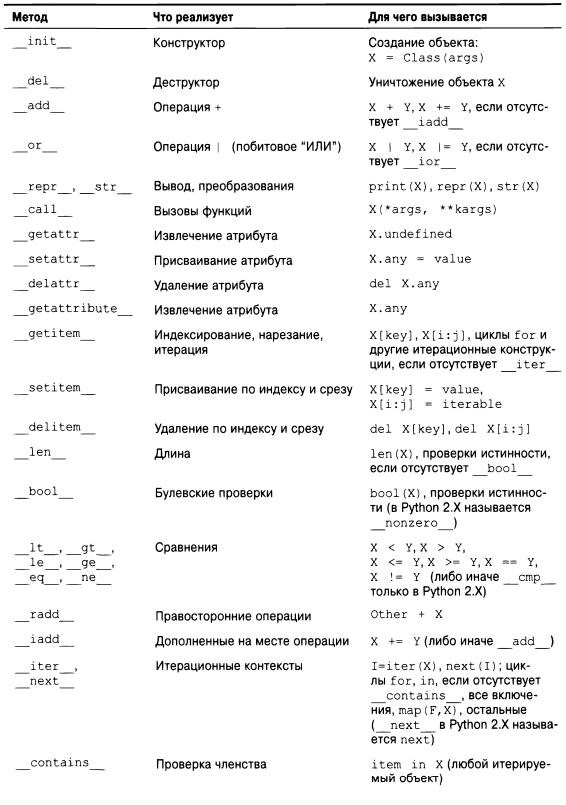 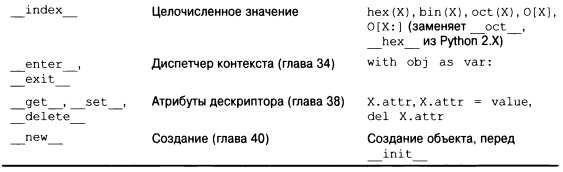

### \_\_getattr\_\_, \_\_setattr\_\_, \_\_getattribute\_\_

> *\_\_setattr\_\_(self, attr, value) – автоматически вызывается при изменении атрибута attr класса новым значением value;*
>
> *\_\_getattribute\_\_(self, attr) – автоматически вызывается при получении атрибута класса с именем attr;*
>
> *\_\_getattr\_\_(self, attr) – автоматически вызывается при получении несуществующего атрибута attr класса;*

> *С этими методами связан сложный аспект — возможность зацикливания (т.е. рекурсии). Из-за того, что метод **\_\_getattr\_\_** вызывается только для неопределенных атрибутов, в своем коде он может свободно извлекать другие атрибуты. Однако поскольку **\_\_getattribute\_\_** и **\_\_setattr\_\_** запускаются для всех атрибутов, при доступе к другим атрибутам в их коде потребуется проявлять осмотрительность, чтобы избежать повторного вызова самих себя и образования рекурсивного цикла. Например, извлечение еще одного атрибута внутри кода метода **\_\_getattribute\_\_** снова запустит **\_\_getattribute\_\_** и в коде обычно происходит зацикливание до тех пор, пока не будет исчерпана доступная память.*

In [ ]:
def __getattribute__(self, name):
    x = self.other                 # ЗАЦИКЛИВАНИЕ!

> *Во избежание рекурсии реализация метода не должна пытаться присвоить атрибут объекту обычным путём: **self.name = value**. 
Вместо этого следует добавить атрибут в словарь атрибутов объекта, например: **self.\_\_dict\_\_[name] = value**. 
При этом для классов нового стиля предпочтительно обратиться к методу базового класса: **object.\_\_setattr\_\_(self, name, value)**.*

In [ ]:
def __getattribute__ (self, name):
    x = object.__getattribute__ (self, 'other')

In [14]:
class A:
    def __setattr__(self, attr, val):
        if isinstance(val, int):
            object.__setattr__(self, attr, val)
        else:
            raise AttributeError("Attribute error!")
            
ex = A()
ex.a = 5
print(ex.a)
# но
ex.b = '5'  # AttributeError: Attribute error!

5


AttributeError: Attribute error!

In [15]:
class A:
    def __init__(self):
        self.a = 5
        
    def __getattr__(self, attr):
        return f'New attribute - {attr}'

ex = A()
print(ex.a) # Метод не вызывается, если значение удалось получить обычным способом.
# но
print(ex.b)

5
New attribute - b


In [16]:
class A:
    def __init__(self):
        self.a_attr = 5
        self.b_attr = 10
        
    def __getattribute__(self, attr):
        if attr.startswith('a'):
            raise AttributeError("Attribute error!")
        else:
            return object.__getattribute__(self, attr)

ex = A()
print(ex.b_attr)
# но
print(ex.a_attr)   # AttributeError: Attribute error!

10


AttributeError: Attribute error!

### Итерация. Итерируемый объект.

> *Итерация - процедура взятия элементов объекта по очереди.*
>
> *Итерируемый объект (iterable) - объект, который способен возвращать элементы по одному. Это объект из которого можно получить итератор (т.е этот объект имеет метод **\_\_iter\_\_** или **\_\_getitem\_\_**). За получение итератора отвечает функция **iter()**. Функция **iter()** отработает на любом объекте, у которого есть метод **\_\_iter\_\_** или метод **\_\_getitem\_\_**. Метод **\_\_iter\_\_** возвращает итератор!* 
>
> *Итератор (iterator) - это объект, который возвращает свои элементы по одному за раз. Объект итератор имеет метод **\_\_next\_\_**. Этот метод возвращает следующий элемент, если он есть, или возвращает исключение StopIteration, когда элементы закончились. Для того, чтобы итератор снова начал возвращать элементы, его надо заново создать. Итерационные контексты (цикл for, in, функция map() и т.д.) создают новый итератор.*
>
> *В качестве удобства для выполнения итерации вручную доступна также встроенная функция next — вызов **next(I)** представляет собой то же самое, что и **I.\_\_ next\_\_()**.*

In [17]:
class MyRange:
    def __init__(self, *args):
        lr = len(args)
        if lr == 3:
            self.val = args[0]-args[2]
            self.stop = args[1]-1
            self.step = args[2]
        elif lr == 2:
            self.val = args[0]-1
            self.stop = args[1]-1
            self.step = 1
        elif lr == 1:
            self.val = -1
            self.stop = args[0]-1
            self.step = 1
        else:
            raise TypeError
        
    def __iter__(self):
        return self
    
    def __next__(self):  
        self.val += self.step
        if self.val > self.stop:
            raise StopIteration
        return self.val**2
    
    
print([_ for _ in MyRange(0, 10, 3)])
print([_ for _ in MyRange(3, 12)])
print([_ for _ in MyRange(7)])

# но !
a = MyRange(1, 11, 2)
print([_ for _ in a])
print(next(a))    # StopIteration  - одиночная итерация

[0, 9, 36, 81]
[9, 16, 25, 36, 49, 64, 81, 100, 121]
[0, 1, 4, 9, 16, 25, 36]
[1, 9, 25, 49, 81]


StopIteration: 

In [18]:
# Множественная итерация
class MyRange:
    def __init__(self, *args):
        lr = len(args)
        if lr == 3:
            self.val = args[0]-args[2]
            self.stop = args[1]-1
            self.step = args[2]
        elif lr == 2:
            self.val = args[0]-1
            self.stop = args[1]-1
            self.step = 1
        elif lr == 1:
            self.val = -1
            self.stop = args[0]-1
            self.step = 1
        else:
            raise TypeError
        
    def __iter__(self):
        return MyRangeIterator(self.val, self.stop, self.step)

# класс итератор
class MyRangeIterator:
    def __init__(self, *args):
        self.val = args[0]
        self.stop = args[1]
        self.step = args[2]
    
    def __next__(self):  
        self.val += self.step
        if self.val > self.stop:
            raise StopIteration
        return self.val**2
    
    
print([_ for _ in MyRange(0, 10, 3)])
print([_ for _ in MyRange(3, 12)])
print([_ for _ in MyRange(7)])

# здесь уже можно использовать множественную итерацию !
a = MyRange(1, 11, 2)
for i in a:
    for j in a:
        print(i+j, end=' ')
    print('\n')

[0, 9, 36, 81]
[9, 16, 25, 36, 49, 64, 81, 100, 121]
[0, 1, 4, 9, 16, 25, 36]
2 10 26 50 82 

10 18 34 58 90 

26 34 50 74 106 

50 58 74 98 130 

82 90 106 130 162 



In [19]:
# Комбинирование метода __iter__ и оператора генераторных функций yield
# Также есть поддержка множественных активных итераторов
class MyRange:
    def __init__(self, *args):
        self.args = args
        
    def __iter__(self):
        for v in range(*self.args):
            yield v**2
    
print([_ for _ in MyRange(3, 12)])

# также !
a = MyRange(1, 11, 2)
for i in a:
    for j in a:
        print((i,j), end=' ')

[9, 16, 25, 36, 49, 64, 81, 100, 121]
(1, 1) (1, 9) (1, 25) (1, 49) (1, 81) (9, 1) (9, 9) (9, 25) (9, 49) (9, 81) (25, 1) (25, 9) (25, 25) (25, 49) (25, 81) (49, 1) (49, 9) (49, 25) (49, 49) (49, 81) (81, 1) (81, 9) (81, 25) (81, 49) (81, 81) 

### \_\_add\_\_, \_\_radd\_\_ (правосторонее сложение, объект в операции находится с правой стороны)

In [20]:
class Base:
    def __init__(self, val):
        self.val = val
    
    def __add__(self, other):
        return f'add ({self.val + other})'
    
    def __radd__(self, other):
        return f'radd ({other + self.val})'
    
    
a = Base(3)
b = Base(2)
print(a+1)
print(1+a)
# !
print(a+b) 
# a и b здесь являются экземплярами того же самого класса; когда в выражении смешиваются экземпляры разных классов, 
# предпочтение отдается классу экземпляра с левой стороны. При сложении двух экземпляров выполняется метод __add__,
# который в свою очередь запускает __radd__, упрощая левый операнд.

add (4)
radd (4)
add (radd (5))


In [21]:
class Base_t:
    def __init__(self, val):
        self.val = val
    
    def __add__(self, other):
        if isinstance(other, Base_t):    # Проверка типа во избежания вложенности объектов
            other = other.val
        return Base_t(self.val + other)
    
    def __radd__(self, other):
        return Base_t(other+self.val)
    
    def __str__(self):
        return f'({self.__class__.__name__}: {self.val})'
    
a = Base_t(3)
b = Base_t(2)
print(a+1)
print(1+a)
# !
print(a+b) # He вложенный объект: не вызывает рекурсивно __radd__

(Base_t: 4)
(Base_t: 4)
(Base_t: 5)


### Псевдозакрытые атрибуты.
>*Псевдозакрытые атрибуты - атрибуты начинающиеся с двух символов подчеркивания.*
>
>*Корректировка имен происходит только для имен, появляющихся внутри кода оператора **class**, и затем только для имен, которые начинаются с двух символов подчеркивания. Тем не менее, она работает для каждого имени, предваренного двумя
символами подчеркивания — атрибутов классов (в том числе имен методов) и атрибутов экземпляров, присвоенных в **self**.*
>
>*Скажем, в классе Base метод по имени **\_\_meth** после корректировки превращается в **\_Base\_\_meth**, а ссылка на атрибут экземпляра **self.\_\_X** видоизменяется на **self.\_Base\_\_X**.*

In [22]:
class Base:
    ...
    def __some(self):
        ...

        
a = Base()
for _ in dir(a):
    print(_, end=', ')

_Base__some, __class__, __delattr__, __dict__, __dir__, __doc__, __eq__, __format__, __ge__, __getattribute__, __gt__, __hash__, __init__, __init_subclass__, __le__, __lt__, __module__, __ne__, __new__, __reduce__, __reduce_ex__, __repr__, __setattr__, __sizeof__, __str__, __subclasshook__, __weakref__, 

>*При множественном наследовании если атрибут указан без двух символов подчеркивания в каждом классе одним именем то экземпляр будет содержать значение атрибута последнего класса в наследовании. Если указать в каждом классе\-родителе атрибут с двумя символами подчеркивания то экземпляр будет содержать два атрибута, а в их именах будет фигурировать имена классов.*

In [23]:
class class_A:
    def ma1(self): self.X = 'A1'
    def ma2(self): self.__X = 'A2' 

class class_B:
    def mb1(self): self.X = 'B1' 
    def mb2(self) : self.__X = 'B2'

class Base(class_A, class_B): pass

ex = Base()
ex.ma1()
ex.ma2()
ex.mb1()
ex.mb2()
print(ex.__dict__)

{'X': 'B1', '_class_A__X': 'A2', '_class_B__X': 'B2'}


### Несвязанные и связанные методы

In [24]:
class Base:
    def some(self):
        return 'Some'
    
ex = Base()
print(Base.some(ex))   # несвязанный метод
print(ex.some())       # связанный метод

obj = Base.some        # объект не связанного метода
print(obj(ex))

obj1 = ex.some         # объект связанного метода
print(obj1)             

Some
Some
Some
<bound method Base.some of <__main__.Base object at 0x0000016E808A1B20>>


### Множественное наследование. Подмешивание (mixin).

In [25]:
class Parent:
    def __init__(self):
        self.a = 10
        
class Mixin:
    def __str__(self):
        return "mixin str method"

    
class Child_1(Parent): ...    
class Child_2(Parent, Mixin): ...
    
    
ex1 = Child_1()
print(ex1)
# но
ex2 = Child_2()
print(ex2)

mixin str method


### MRO

> *Классы нового стиля (т.е. все классы в Python З.Х) имеют атрибут **класс.\_\_ mro\_\_**. Указанный атрибут представляет собой кортеж, который дает линейный порядок поиска, используемый Python при просмотре атрибутов в суперклассах. В действительности этот атрибут является порядком наследования в классах нового стиля.*

In [26]:
# ! при ромбовидной схеме
class A: pass

class B(A): pass

class C(A): pass

class D(B, C): pass
    
print(D.__mro__)

(<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>)


In [27]:
# ! при НЕ ромбовидной схеме, наследование производится классически (сначала в глубину, затем слева направо) 
class A: pass
class B: pass
class C(A): pass
class D(B): pass
class E(C, D): pass
print(E.__mro__)

(<class '__main__.E'>, <class '__main__.C'>, <class '__main__.A'>, <class '__main__.D'>, <class '__main__.B'>, <class 'object'>)


### \_\_slots\_\_

> *Для экземпляра определенны только аттрибуты с именами в списке **\_\_slots\_\_**. Именам атрибутов экземпляров должны присваиваться значения, прежде чем на них можно будет ссылаться.*
>
> *Слоты трудно использовать корректно и, как указано в руководстве, их лучше всего оставлять для тех редких случаев, когда имеется большое количество экземпляров в приложении, критичном к потреблению памяти.*

In [28]:
class A:
    __slots__ = ['var1', 'var2']
           
a = A()
a.var1 = 1
# но
print(a.var2)  # AttributeError: var2  - не присвоено значение
# также ошибка
a.var3 = 3      # AttributeError: 'A' object has no attribute 'var3'. ! var3  не определена в списке __slots__     

AttributeError: var2

> *Когда применяются слоты, экземпляры обычно не имеют словаря атрибутов — взамен интерпретатор Python использует
представляемое позже средство дескрипторов класса для выделения и управления пространством, зарезервированным под слотовые атрибуты в экземпляре.*

> *Множество списков **\_\_slots\_\_** в суперклассах.*

In [29]:
class A:
    __slots__ = ['a', 'b']
class B(A):
    __slots__ = ['c', 'd']
    
ex = B()
ex.a = 1
ex.b = 2
ex.c = 3
ex.d = 4
for r in map(lambda v: getattr(ex, v), ['a', 'b', 'c', 'd']):
    print(r)

1
2
3
4


> *Список **\_\_slots\_\_** предотвращает существование **\_\_dict\_\_** экземпляра и присваивание значений именам, отсутствующим в списке, если **\_\_dict\_\_** явно не включен в список.*

In [30]:
class A:
    __slots__ = ['a', 'b',  '__dict__'] # __dict__ включен в список __slots__
    
ex = A()
ex.a = 1
ex.b = 2
# также
ex.c = 3
print(ex.__dict__)
print(dir(ex))

{'c': 3}
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', 'a', 'b', 'c']


### Свойства.

> *Свойства позволяют получить атрибут, значение которого вычисляется динамически, то есть во время обращения к атрибуту.*
>
> *Протокол свойств позволяет направлять операции извлечения, установки и удаления конкретного атрибута предоставляемым функциям или методам, что дает возможность вставлять код, подлежащий автоматическому выполнению при доступе к атрибуту, перехватывать операции удаления атрибута и обеспечивать документацией по атрибутам.*
>
> *Свойство управляет одним конкретным атрибутом.*
>
> *Свойства наследуются экземплярами и подклассами на более низких уровнях.*

> *Синтаксис функции*
>
> *__атрибут = property(getter=None, setter=None, deleter=None, doc_string=None)__*
>
> *Ни один из аргументов встроенной функции property не является обязательным, и все они получают стандартное значение None, если не передается иное. Для первых трех аргументов None означает, что соответствующая операция не поддерживается, и попытка ее выполнить приведет к генерации исключения AttributeError.*

In [67]:
class Prop:
    def __init__(self, name):
        self._name = name
    def fget(self):
        return self._name
    def fset(self, new_name):
        self._name = new_name
        return self._name
    def fdel(self):
        del self._name
    name = property(fget, fset, fdel, 'doc string') 

ex = Prop('Maks')
print(ex.name)
ex.name = 'John'
print(ex.name)
print(Prop.name.__doc__)
del ex.name
print(ex.name)

Maks
John
doc string


AttributeError: 'Prop' object has no attribute '_name'

In [31]:
class A:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def getter_info(self):
        return f'{self.name} - {self.age}'
    
    def setter_info(self, new_info):
        self.name, self.age = new_info.split(' ')
    
    info = property(getter_info, setter_info, None, None)       
    
ex = A('Maks', 21)
print(ex.info)
# ! info выглядит как атрибут, вычисляется динамически

ex.info = 'John 35'   # ! setter
print(ex.info)

Maks - 21
John - 35


> *Встроенная функция **property** может использоваться в качестве декоратора для определения функции, которая будет запускаться автоматически при извлечении атрибута.*

In [32]:
class A:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    @property
    def info(self):
        return f'{self.name} - {self.age}'
    
    @info.setter
    def info(self, new_info):
        self.name, self.age = new_info.split(' ')
        
    @info.deleter
    def info(self):
        del self.name
        del self.age
    
ex = A('Maks', 21)
print(ex.info)  # getter
ex.info = 'John 35'   # setter
print(ex.info)

Maks - 21
John - 35


### Дескрипторы.

> *Дескрипторы атрибутов — это классы с методами **\_\_get\_\_** и **\_\_set\_\_**, которые присваиваются атрибутам класса, наследуются экземплярами и предназначены для перехвата доступа по чтению и записи к специфическим атрибутам.*
>
> *Дескрипторы имеют доступ к состоянию в экземплярах самих себя, а также своего клиентского класса, и в некотором смысле являются более универсальной формой свойств.*
>
> *Дескрипторы создаются в виде независимых классов, имеют собственное состояние, и присваиваются атрибутам классов в точности как функции методов. Подобно любым другим атрибутам классов они наследуются подклассами и экземплярами. Как и свойство, дескриптор управляет одним конкретным атрибутом.*
>
> *Классы с любым таким методом как **\_\_get\_\_**, **\_\_set\_\_**, **\_\_delete\_\_** считаются дескрипторами.*

In [ ]:
class Descriptor:
    """docstring goes here"""                   # Строка документации
    def __get__(self, instance, owner): ...     # Возвращает значение атрибута
    def __set__(self, instance, value): ...     # Ничего не возвращает (None)
    def __delete__ (self, instance): ...        # Ничего не возвращает (None)

> *Всем трем методам дескриптора, передаются экземпляр класса дескриптора **(self)** и экземпляр клиентского класса **(instance)**, к которому присоединен экземпляр дескриптора. Метод доступа **\_\_get\_\_** также принимает аргумент **(owner)**, указывающий класс, к которому присоединен экземпляр дескриптора.*

In [72]:
class Descriptor:
    def __get__(self, instance, owner):
        print(f'Self: {self}\nInstance: {instance}\nOwner: {owner}\n')
            
class A:
    a = Descriptor()

ex = A()
ex.a
A.a

Self: <__main__.Descriptor object at 0x0000026FA9481460>
Instance: <__main__.A object at 0x0000026FA9481850>
Owner: <class '__main__.A'>

Self: <__main__.Descriptor object at 0x0000026FA9481460>
Instance: None
Owner: <class '__main__.A'>



> *В отличие от свойств простого отсутствия метода **\_\_set\_\_** в дескрипторе недостаточно для того, чтобы сделать атрибут допускающим только чтение, т.к. имени дескриптора может быть присвоено значение в экземпляре!*
>
> *Чтобы сделать основанный на дескрипторе атрибут допускающим только чтение, необходимо перехватить операцию присваивания в классе дескриптора и сгенерировать исключение для предотвращения присваивания атрибуту.*

In [74]:
class D:
    def __get__(*args) : print('get')
    def __set__(*args) : raise AttributeError('cannot set')

class C:
    a = D()
X = C()
X.a              # Направляется C.a.__get__
X.a = 99         # Направляется C.a.__set__

get


AttributeError: cannot set

In [76]:
# Пример
class Name:
    "name descriptor docs"
    def __get__(self, instance, owner): # self-экземпляр класса Name, instance-экземпляр класса Person, owner-класс Person
        return instance._name
    
    def __set__(self, instance, value):
        instance._name = value
    
    def __delete__(self, instance):
        del instance._name

        
class Person:
    def __init__(self, name):
        self._name = name
    name = Name()

p = Person('Maks')
print(p.name)
p.name = 'John'
print(p.name)

Maks
John


> *Дескрипторы могут использовать состояние экземпляра и состояние дескриптора, а также любое их сочетание. Состояние дескриптора применяется для управления либо данными, используемыми при внутренней работе дескриптора, либо данными, которые охватывают все экземпляры. Состояние экземпляра хранит информацию, связанную и возможно созданную клиентским классом.*

In [77]:
class Desc:
    def __init__(self, val):
        self.val = val
        
    def __get__(self, instance, owner):
        return self.val
    
    ...
    
class A:
    x = Desc(20)
    def __init__(self):
        self.a = 10

ex = A()
print(ex.x, ex.a)

20 10


> *Операции присваивания значений атрибутам внутри метода конструктора **\_\_init\_\_** запускают методы **\_\_set\_\_** дескриптора.*

 ### Статические методы (staticmethod) и методы класса (classmethod)

> *Метод экземпляра должен всегда вызываться с объектом экземпляра. Когда метод вызывается через экземпляр, интерпретатор Python автоматически передает объект экземпляра в первом (крайнем слева) аргументе; при вызове метода экземпляра через класс экземпляр потребуется передавать вручную.*
>
> *По контрасту статические методы вызываются без аргумента экземпляра. Использование встроенной функции staticmethod позволяет методам подобного рода вызываться также через экземпляр или через класс.*
>
> *Интерпретатор Python автоматически передает методу класса в первом аргументе класс (не экземпляр). Может вызыватся через класс или через экземпляр.*

In [22]:
class Base:
    def meth(self):
        return 'base method'
    
    @classmethod
    def cmeth(cls):
        return f'class method {cls.__name__}'
    
    @staticmethod
    def smeth():
        return 'static method'
    
    
a = Base()
# метод экземпляра
print(a.meth())
print(Base.meth(a))

# метод класса 
print(a.cmeth())
print(Base.cmeth())

# статический метод
print(a.smeth())
print(Base.smeth())

base method
base method
class method Base
class method Base
static method
static method


In [23]:
# подсчет количества экземпляров класса с помощью метода класса
class class_MC:
    count = 0
    
    @classmethod
    def count_objects(cls):
        return cls.count
    
    def __init__(self):
        class_MC.count += 1

    def __del__(self):
        class_MC.count -= 1

In [24]:
# вызов метода класса осуществляется через объект экземпляра
ax = class_MC()
print(ax.count_objects())
bx = class_MC()
print(bx.count_objects())
del(ax)
print(bx.count_objects())

1
2
1


In [32]:
# подсчет количества экземпляров класса с помощью статического метода
class class_MS:
    count = 0
    
    @staticmethod
    def count_objects():
        return class_MS.count
    
    def __init__(self):
        class_MS.count += 1

    def __del__(self):
        class_MS.count -= 1

In [35]:
# вызов метода класса осуществляется через объект экземпляра
axs = class_MS()
print(axs.count_objects())
bxs = class_MS()
print(bxs.count_objects())
del(axs)
print(bxs.count_objects())

1
2
1


> *Всякий раз, когда запускается метод класса, передается самый нижний класс, даже для подклассов, которые не имеют собственных методов классов.*

In [48]:
class Base:
    count = 0
    
    @classmethod
    def count_objects(cls):
        return f'{cls.count} at {cls.__name__}'
    
    def __init__(self):
        Base.count += 1
        
class Other(Base):
    ...

In [49]:
a = Base()
b = Other()
print(a.count_objects())
print(b.count_objects())

2 at Base
2 at Other


### Декораторы

> *Синтаксис декорирования*

In [ ]:
# Функция декоратор
def dec_func(func): ...
def dec_func_cl(aClass): ...
    
# декорирование функции
    # с помощью повторной привязки к имени
    def func(): ...
    
    func = dec_func(func)
    
    # с помощью декорирования
    @dec_func
    def func(): ...
    

# декорирование метода класса
    # с помощью повторной привязки к имени
    class Base:
        def meth(): ...

        meth = dec_func(meth)

    # с помощью декорирования
    class Two:
        @dec_func
        def meth(): ...
            
            
# декорирование класса
    # с помощью повторной привязки к имени
    class Base: ...
    
    Base = dec_func_cl(Base)
    
    # с помощью декорирования
    @dec_func_cl
    class Base: ...

In [ ]:
# Класс декоратор
class dec_class:
    ...

    
# декорирование функции
    # с помощью повторной привязки к имени
    def func(): ...
    
    func = dec_class(func)
    
    # с помощью декорирования
    @dec_class
    def func(): ...
    

# ! Декорирование метода класса терпит неудачу.
# Проблема заключается в том, что аргумент self в методе __call__ декоратора получает экземпляр класса декоратора, 
# когда метод вызывается позже, и экземпляр класса декорируемого метода никогда не помещается в *args. В результате 
# направление вызова исходному методу становится невозможным — объект декоратора хранит исходную функцию метода, но не 
# располагает экземпляром, чтобы ей передать.
# Решение - использовать дескриптор с методом __get__.
# Декорированные функции вызывают только метод __call__ и никогда метод __get__.
# Декорированные методы вызывают сначала метод __get__, чтобы выполнить извлечение имени метода (для I.метод); 
# возвращенный методом __get__ объект хранит экземпляр целевого класса и затем вызывается с целью завершения
# выражения вызова, тем самым запуская метод __call__ декоратора.

class dec_desc() :               # декоратор + дескриптор
    def __init__ (self, func):   
        self.calls = 0           # Сохранение функции для вызова в будущем
        self.func = func
    def __call__ (self, *args, **kwargs):         # При обращении к исходной функции
        self.calls += 1
        print('call %s to %s' % (self.calls, self.func.__name__ ))
        return self.func(*args, **kwargs)
    def __get__ (self, instance, owner) :            # При извлечении метода
        def wrapper(*args, **kwargs):                # Сохранение обоих экземпляров
            return self(instance, *args, **kwargs)   # Запускается __call__
        return wrapper
    
    
    
# декорирование класса
    # с помощью повторной привязки к имени
    class Base: ...
    
    Base = dec_class(Base)
    
    # с помощью декорирования
    @dec_class
    class Base: ...

> *Примеры декорирования*

In [79]:
# Функция декоратор со вложенным классом
def decorator(cls) :                 
    class Wrapper:
        def __init__(self, *args) :     # При создании экземпляров
            self.wrapped = cls(*args)
        def __getattr__(self, name) :   # При извлечении атрибутов
            return getattr(self.wrapped, name)
    return Wrapper

@decorator
class C:                         # C = decorator(C)
    def __init__ (self, x, у) :  # Запускается методом Wrapper,__init__
        self.attr = 'spam'

x = C(6, 1)                      # ! В действительности вызывается Wrapper(6 , 1)
print (x.attr)

spam


In [53]:
# класс декоратор
class caller:
    def __init__(self, func):
        self.func = func
        
    def __call__(self, *args):
        for arg in args:
            print(arg)
        return self.func(*args)

# декорирование функции  
# !!! sum_args = caller(sum_args) --> sum_args берет роль экземпляра
@caller
def sum_args(a, b, c):
    return a + b + c

# по факту вызов экземпляра класса caller
print(sum_args(2, 3, 4))

2
3
4
9


In [52]:
# функция декоратор
def caller(func):
    def call(*args):
        for arg in args:
            print(arg)
        return func(*args)
    return call

# sum_args = caller(sum_args)
@caller
def sum_args(a, b, c):
    return a + b + c

print(sum_args(2, 3, 4))

2
3
4
9


In [ ]:
# Пример подсчета времени выполнения функции
import time
import random

def duration(func):
    def wrap(*args):
        start = time.monotonic_ns()
        result = func(*args)
        print(f'{(time.monotonic_ns() - start) // 1000000}ms')
        return result
    return wrap

@duration
def new(l):
    return sum(l)

print(new([random.randrange(0, 100000) for i in range(1, 1000000)]))

In [ ]:
# Пример подсчета времени выполнения функции через класс
class duration_cl:
    def __init__(self, func):
        self.func = func

    def __call__(self, *args):
        start = time.monotonic_ns()
        result = self.func(*args)
        print(f'{(time.monotonic_ns() - start) // 1000000}ms')
        return result

@duration_cl
def new(l):
    return sum(l)

print(new([random.randrange(0, 100000) for i in range(1, 1000000)]))

> *Вложенность декораторов. Каждый декоратор обрабатывает результат предыдущего декоратора, который может быть исходной функцией или вставленным объектом-оболочкой. Декоратор, указанный последним, применяется первым и является наиболее
глубоко вложенным декоратором, когда позже происходит вызов имени исходной функции.*

In [ ]:
@second
@first
def func(): ...

> *Аргументы декоратора.* 

In [85]:
def decor_ext(a, b):
    def decor_int(func):
        def wrap(*args):            
            return func(*args)+(a+b)
        return wrap
    return decor_int

@decor_ext(4, 5)
def sm(x, y):
    return x + y

print(sm(2, 3))

14


In [ ]:
# Пример подсчета вызовов функции через декоратор функции и декоратор класса.
def decor(func):
    d = {}
    def wrap(*args):
        nonlocal d                   # переменная d в объемлющей области видимости
        if func.__name__ not in d:
            d[func.__name__] = 0
        d[func.__name__] += 1
        print(f'{func.__name__}: {d[func.__name__]}')
        return func(*args)
    return wrap


class decor_cl:
    cnt = 0
    def __init__(self, func):
        self.cnt = 0
        self.func = func
    def __call__(self, *args):
        self.cnt += 1
        print(f'{self.func.__name__}: {self.cnt}')
        return self.func(*args) 


In [ ]:
# Комбинация декоратора класса и декоратора функции
def decorateAll(dec):
    def DecoDecorate(aClass):
        for el in aClass.__dict__:
            if callable(aClass.__dict__[el]):
                setattr(aClass, el, dec(aClass.__dict__[el]))
        return aClass
    return DecoDecorate


def dec(func):
    def wrap(*args):
        print('dec_func')
        return func(*args)
    return wrap
 

@decorateAll(dec) # Использование декоратора классов
class Person: # Применение декоратора функций к методам
    def __init__ (self, name, pay): # Person = decorateAll (,,) (Person)
        self.name = name # Person = DecoDecorate(Person)
        self.pay = pay
    def giveRaise(self, percent):
        self.pay *= (1.0 + percent)
    def lastName(self):
        return self.name.split()[-1]

bob = Person('Bob Smith', 50000)
sue = Person('Sue Jones', 100000)
print(bob.name, sue.name)
sue.giveRaise(.10)
print('%.2f' % sue.pay)

### super()

> *Функция **super()**, применяется для вызова методов суперкласса обобщенным образом.*

In [54]:
class A:
    def action(self):
        print('A')
        
class B(A):
    def action(self):
        super().action()
        print('B')

ex = B()
ex.action()

A
B


>*При множественном наследовании при ромбовидной схеме функция super выбирать только крайний слева суперкласс,
имеющий выполняемый метод (формально первый согласно MRO).*

In [57]:
class A:
    def action(self):
        print('A')
        
class B:
    def action(self):
        print('B')
        
class C(A, B):
    def action(self):
        super().action()

class D(B, A):
    def action(self):
        super().action()
        
ex = C()
ex.action()
# и
ex2 = D()
ex2.action()

A
B


> *Традиционная форма указания суперклассов в классах при глубоком множественном наследовании. Особенности наследования в ромбовидной схеме не применяются!* 

In [63]:
class A:
    def meth(self): print('meth A')
        
class B(A):
    def meth(self): print('meth B'), A.meth(self)
        
class C(A):
    def meth(self): print('meth C'), A.meth(self)
        
class D(B, C):
    def meth(self): print('meth D'), B.meth(self), C.meth(self)

print(D.__mro__)
D().meth()

(<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>)
meth D
meth B
meth A
meth C
meth A


> *Указание суперклассов в классах с помощью функции **super()** при глубоком множественном наследовании. Особенности наследования в ромбовидной схеме применяются!*

In [65]:
class A:
    def meth(self): print('meth A')
        
class B(A):
    def meth(self): print('meth B'), super().meth()
        
class C(A):
    def meth(self): print('meth C'), super().meth()
        
class D(B, C):
    def meth(self): print('meth D'), super().meth()

print(D.__mro__)
D().meth()

(<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>)
meth D
meth B
meth C
meth A


### Метаклассы

> *Метаклассы дают возможность перехватывать и дополнять создание классов — они предоставляют API-интерфейс для вставки дополнительной логики, подлежащей выполнению в завершение оператора class.*
>
> *Метаклассы позволяют вставлять логику, подлежащую автоматическому выполнению в конце оператора class, когда создается объект класса. Механизм метаклассов поручает процедуру создания самого класса специализированной логике.*
>
> *По контрасту с декораторами классов метаклассы запускаются во время создания классов, чтобы создать и возвратить новый клиентский класс.*

> *Объявляя метакласс, интерпретатору Python сообщается о том, что процесс создания объекта класса должен быть направлен указанному нами другому классу.*

In [ ]:
def extra(self, arg): ...

class Extras(type):
    def __init__ (Class, classname, superclasses, attributedict):
        if required():               # некая проверка
            Class.extra = extra

class Clientl(metaclass=Extras): ... # Только объявление метакласса

class Client2(metaclass=Extras): ... # Клиентский класс является экземпляром метакласса
    
class Client3(metaclass=Extras): ...
X = Clientl()                        # X - экземпляр Clientl
X.extra()

> *Объекты классов, определяемых пользователей, представляют собой экземпляры объекта по имени __type__, который сам по себе является классом.*
> *Классы являются типами, а типы - классами. То есть:*
>   + *типы определяются классами, которые унаследованы от __type__;*
>   + *определяемые пользователем классы являются экземплярами класса __type__;*
>   + *определяемые пользователем классы представляют собой типы, которые генерируют собственные экземпляры.*

> *Все определяемые пользователем классы являются экземплярами класса __type__, а объекты экземпляров — экземплярами своих классов. В действительности классы имеют атрибут **\_\_class\_\_** , ссылающийся на __type__, точно так же, как экземпляр имеет атрибут **\_\_class\_\_** , ссылающийся на класс, из которого он был создан.*

In [4]:
class Base():
    ...

print(Base.__class__)
print(type(Base))
ex = Base()
print(ex.__class__)
print(type(ex))
# но !
print(type.__class__)

<class 'type'>
<class 'type'>
<class '__main__.Base'>
<class '__main__.Base'>
<class 'type'>


> + *__type__ является классом, который генерирует классы, определяемые пользователем;*
> + *метаклассы представляют собой подклассы класса __type__;*
> + *объекты классов являются экземплярами класса __type__ или какого-то из его подклассов;*
> + *объекты экземпляров генерируются из класса.*

In [ ]:
class Base(SuperClass, metaclass=Meta):
    data = 5
    def meth(self, val):
        self.data = val
# Вызов для создания объекта class, выполняемый в конце оператора class, модифицируется так, 
# чтобы обращаться к метаклассу, а не к type:
# класс = Meta(имя_класса, суперклассы, словарь_атрибутов)
# Base = Meta(’Base', (SuperClass,), {'data': 5, 'meth': meth, '__module__': '__ main__'})

> *Будучи подклассами __type__, они могут переопределять методы объекта __type__, настраивая их должным образом. Метаклассы, как правило, переопределяют методы **\_\_new\_\_** и **\_\_init\_\_** класса __type__ для настройки создания и инициализации классов. Хотя и реже, они могут переопределять также метод **\_\_call\_\_**, если требуется напрямую перехватывать вызов создания класса в конце.*
> *Метакласс является подклассом **type**, метод **\_\_call\_\_** класса **type** делегирует вызовы для создания и инициализации нового объекта класса метаклассу, если в нем определены специальные версии следующих методов:*
> + *__Meta.\_\_new\_\_(Meta, имя_класса, суперклассы, словарь_атрибутов)__*
> + *__Meta.\_\_init\_\_(класс, имя_класса, суперклассы, словарь_атрибутов)__*

In [6]:
class MetaOne(type):
    def __new__ (meta, classname, supers, classdict):
        print(meta, classname, supers, classdict, sep='\n...')
        return type.__new__(meta, classname, supers, classdict)

class Base(metaclass=MetaOne): ...

ex = Base()     # при создании класса Base отрабатывает метод __new__ метакласса

<class '__main__.MetaOne'>
...Base
...()
...{'__module__': '__main__', '__qualname__': 'Base'}


> *В общем случае метод **\_\_new\_\_** создает и возвращает объект класса, а метод **\_\_init\_\_** инициализирует уже созданный класс, передаваемый в качестве аргумента. Метаклассы могут применять любую из двух или обе привязки для управления классом на стадии создания.*

In [7]:
class MetaTwo(type):
    def __new__ (meta, classname, supers, classdict):
        print('__new__', meta, classname, supers, classdict, sep='\n...')
        return type.__new__(meta, classname, supers, classdict)
    def __init__ (Class, classname, supers, classdict) :
        print('__init__', Class, classname, supers, classdict, sep='\n...')
        print(list(Class.__dict__.keys()))
        
class Base(metaclass=MetaTwo):
    data = 5
    
ex = Base()

__new__
...<class '__main__.MetaTwo'>
...Base
...()
...{'__module__': '__main__', '__qualname__': 'Base', 'data': 5}
__init__
...<class '__main__.Base'>
...Base
...()
...{'__module__': '__main__', '__qualname__': 'Base', 'data': 5}
['__module__', 'data', '__dict__', '__weakref__', '__doc__']


In [8]:
# Простая функция тоже может служить в качестве метакласса
def MetaFunc(classname, supers, classdict):
    print(classname, supers, classdict, sep='\n...')
    return type(classname, supers, classdict)

class Base(metaclass=MetaFunc): ...
    
ex = Base()

Base
...()
...{'__module__': '__main__', '__qualname__': 'Base'}


> *Атрибуты метаклассов не наследуются экземплярами классов!*

In [11]:
class Meta(type): attr = 1
    
class Base(metaclass=Meta):
    ...
    
print(Base.attr)
# ! но
ex = Base()
print(ex.attr)

1


AttributeError: 'Base' object has no attribute 'attr'

#### Перегрузка операций в методах метаклассов

In [15]:
class Meta(type):
    def __getitem__(cls, i):
        return cls.data[i]
    
    def __getattr__(cls, name_attr):
        return getattr(cls.data, name_attr)
    
class Base(metaclass=Meta): data = [1, 2, 3, 4]
    
print(Base[2])
Base.append(5)
print(Base.data)

3
[1, 2, 3, 4, 5]
